In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [33]:

c = cast
c = c[(c.character == "Superman")|(c.character == "Batman")]
c = c.groupby(['year','character']).size().unstack('character').fillna(0)
d = c.Superman - c.Batman
d = d[d>0]
print(len(d))



12


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [40]:
c = cast
c = c[(c.character == "Batman")|(c.character == "Superman")]
c = c.groupby(['year','character']).size().unstack('character').fillna(0)
d = c.Batman - c.Superman
d[d>0]
print(len(d))

47


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

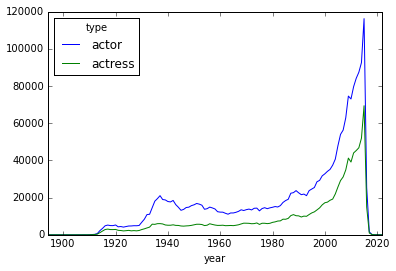

In [58]:
c = cast
c = c[(c.type == "actor") | (c.type == "actress")]
d = c.groupby(['year','type']).size().unstack('type').fillna(0)
d.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

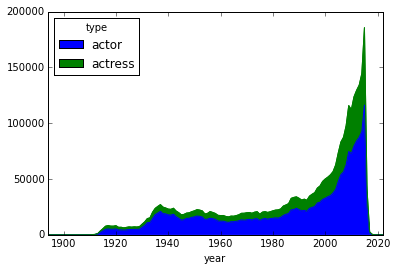

In [65]:
c = cast
c = c.groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
c.plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

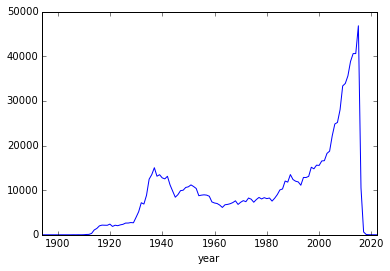

In [73]:
c = cast 
c = c.groupby(['year','type']).size()
c = c.unstack('type').fillna(0)
d = c.actor - c.actress
d.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

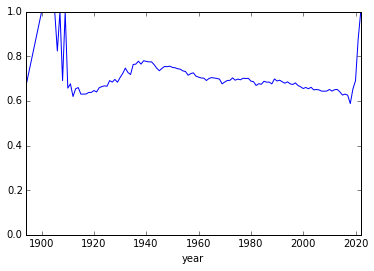

In [89]:
c = cast
c = c.groupby(['year', 'type']).size()
d = c.unstack('type').fillna(0)
(d.actor/(d.actor+d.actress)).plot(ylim = [0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

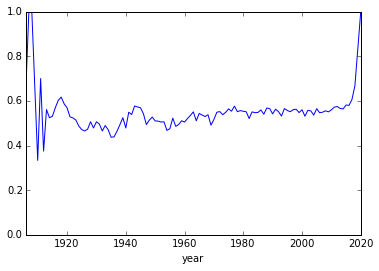

In [103]:
c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
d = c.unstack('type').fillna(0)
(d.actor/(d.actor+d.actress)).plot(ylim = [0,1])


### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

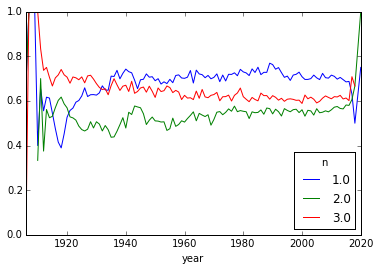

In [131]:
c = cast 
c = c[c.n <= 3]
c = c.groupby(['year','type','n']).size()
d = c.unstack('type')
r = d.unstack('n').fillna(0)
(r.actor/(r.actor+r.actress)).plot()
